In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_predict, learning_curve
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt
from keras.metrics import Recall
from keras.metrics import Precision

In [2]:
spear = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data-spear.csv")
enron = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data-enron.csv")

In [3]:
data = pd.concat([spear,enron],ignore_index=True)

In [4]:
row1 = data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16]]
row2 = data.iloc[:, 15]

In [5]:
data=pd.concat([row2, row1], axis=1)

In [6]:
le = LabelEncoder()
le.fit(data.iloc[:,6])
data.iloc[:,6] = le.transform(data.iloc[:,6])

In [7]:
data=data.astype(int)

In [8]:
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=1/5, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [13]:
import keras.backend as K
def f1_score(y_true, y_pred, threshold_shift=0):
    beta = 2

    y_pred = K.clip(y_pred, 0, 1)

    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    return K.mean((beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon()))

##1 hidden layer, activation ='relu'


In [14]:
model = Sequential()

model.add(Dense(32, activation = 'relu', input_dim = 15))
#model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_score, Precision(name='precision'), Recall(name='recall')])

In [17]:
history = model.fit(X_train, Y_train, batch_size = 10, epochs = 20)


Epoch 1/20
1776/1776 [==============================] - 4s 1ms/step - loss: 0.1985 - accuracy: 0.9528 - f1_score: 0.9528 - precision: 0.9033 - recall: 0.8923
Epoch 2/20
1776/1776 [==============================] - 3s 1ms/step - loss: 0.0383 - accuracy: 0.9903 - f1_score: 0.9903 - precision: 0.9890 - recall: 0.9706
Epoch 3/20
1776/1776 [==============================] - 3s 2ms/step - loss: 0.0362 - accuracy: 0.9903 - f1_score: 0.9903 - precision: 0.9875 - recall: 0.9724
Epoch 4/20
1776/1776 [==============================] - 3s 1ms/step - loss: 0.0349 - accuracy: 0.9904 - f1_score: 0.9904 - precision: 0.9895 - recall: 0.9711
Epoch 5/20
1776/1776 [==============================] - 3s 1ms/step - loss: 0.0329 - accuracy: 0.9907 - f1_score: 0.9907 - precision: 0.9884 - recall: 0.9733
Epoch 6/20
1776/1776 [==============================] - 3s 1ms/step - loss: 0.0311 - accuracy: 0.9907 - f1_score: 0.9907 - precision: 0.9862 - recall: 0.9751
Epoch 7/20
1776/1776 [==============================

In [18]:
model_val = model.evaluate(X_test,Y_test)

139/139 [==============================] - 1s 1ms/step - loss: 0.0360 - accuracy: 0.9912 - f1_score: 0.9911 - precision: 0.9905 - recall: 0.9730


In [19]:
model_val

[0.03601212427020073,
 0.9912142157554626,
 0.9910560250282288,
 0.9905392527580261,
 0.9730483293533325]

In [22]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

In [24]:
import numpy as np
Y_pred = np.argmax(y_pred, axis=1)

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

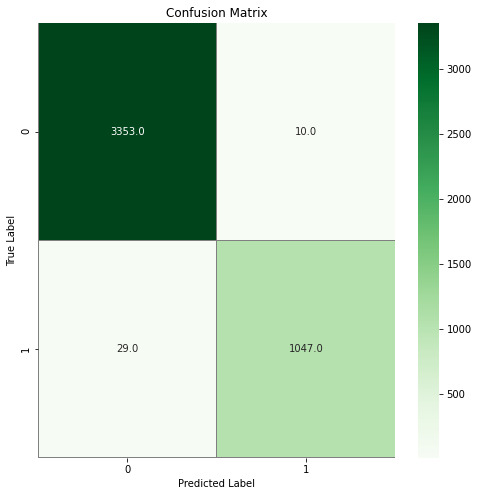

In [28]:
import seaborn as sns
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

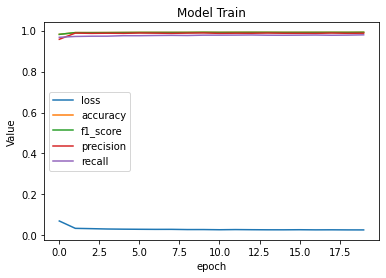

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['f1_score'])
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.title('Model Train')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy','f1_score', 'precision', 'recall'], loc='center left')
plt.show()

## 2 hidden layer 

In [30]:
model = Sequential()

model.add(Dense(32, activation = 'relu', input_dim = 15))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_score, Precision(name='precision'), Recall(name='recall')])

In [33]:
history = model.fit(X_train, Y_train, batch_size = 10, epochs = 20)


Epoch 1/20
1776/1776 [==============================] - 4s 2ms/step - loss: 0.1557 - accuracy: 0.9491 - f1_score: 0.9491 - precision: 0.8793 - recall: 0.9621
Epoch 2/20
1776/1776 [==============================] - 3s 2ms/step - loss: 0.0355 - accuracy: 0.9897 - f1_score: 0.9897 - precision: 0.9862 - recall: 0.9701
Epoch 3/20
1776/1776 [==============================] - 3s 2ms/step - loss: 0.0355 - accuracy: 0.9894 - f1_score: 0.9894 - precision: 0.9838 - recall: 0.9737
Epoch 4/20
1776/1776 [==============================] - 3s 2ms/step - loss: 0.0297 - accuracy: 0.9906 - f1_score: 0.9906 - precision: 0.9871 - recall: 0.9739
Epoch 5/20
1776/1776 [==============================] - 3s 2ms/step - loss: 0.0343 - accuracy: 0.9899 - f1_score: 0.9899 - precision: 0.9853 - recall: 0.9730
Epoch 6/20
1776/1776 [==============================] - 3s 2ms/step - loss: 0.0314 - accuracy: 0.9908 - f1_score: 0.9908 - precision: 0.9889 - recall: 0.9732
Epoch 7/20
1776/1776 [==============================

In [34]:
model_val = model.evaluate(X_test,Y_test)

139/139 [==============================] - 1s 1ms/step - loss: 0.0371 - accuracy: 0.9908 - f1_score: 0.9906 - precision: 0.9933 - recall: 0.9684


In [35]:
model_val

[0.0371382050216198,
 0.9907636642456055,
 0.990606427192688,
 0.9933269619941711,
 0.9684014916419983]

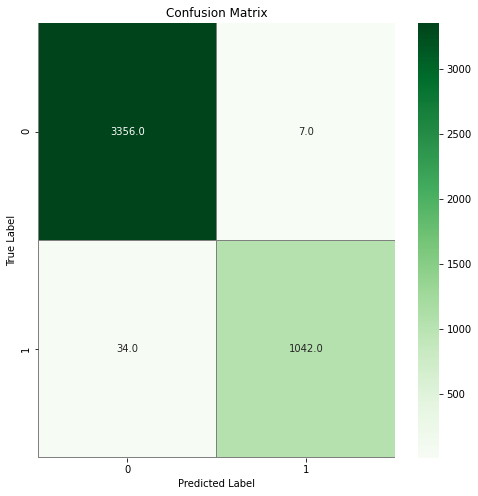

In [37]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

import numpy as np
Y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

import seaborn as sns
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

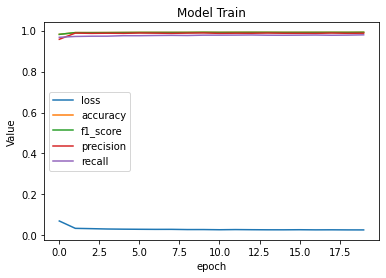

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['f1_score'])
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.title('Model Train')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy','f1_score', 'precision', 'recall'], loc='center left')
plt.show()

## 3 hidden layer 

In [44]:
model.add(Dense(32, activation = 'relu', input_dim = 15))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [48]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_score, Precision(name='precision'), Recall(name='recall')])
history = model.fit(X_train, Y_train, batch_size = 10, epochs = 20)

Epoch 1/20
1776/1776 [==============================] - 4s 2ms/step - loss: 0.1305 - accuracy: 0.9892 - f1_score: 0.9892 - precision: 0.9752 - recall: 0.9839
Epoch 2/20
1776/1776 [==============================] - 3s 2ms/step - loss: 0.0326 - accuracy: 0.9911 - f1_score: 0.9911 - precision: 0.9853 - recall: 0.9786
Epoch 3/20
1776/1776 [==============================] - 3s 2ms/step - loss: 0.0292 - accuracy: 0.9919 - f1_score: 0.9919 - precision: 0.9868 - recall: 0.9799
Epoch 4/20
1776/1776 [==============================] - 3s 2ms/step - loss: 0.0286 - accuracy: 0.9922 - f1_score: 0.9922 - precision: 0.9875 - recall: 0.9791
Epoch 5/20
1776/1776 [==============================] - 3s 2ms/step - loss: 0.0312 - accuracy: 0.9913 - f1_score: 0.9913 - precision: 0.9880 - recall: 0.9757
Epoch 6/20
1776/1776 [==============================] - 3s 2ms/step - loss: 0.0278 - accuracy: 0.9914 - f1_score: 0.9914 - precision: 0.9843 - recall: 0.9803
Epoch 7/20
1776/1776 [==============================

In [49]:
model_val = model.evaluate(X_test,Y_test)

139/139 [==============================] - 1s 1ms/step - loss: 0.0294 - accuracy: 0.9919 - f1_score: 0.9917 - precision: 0.9906 - recall: 0.9758


In [50]:
model_val

[0.029415126889944077,
 0.9918900728225708,
 0.9917305111885071,
 0.9905660152435303,
 0.975836455821991]

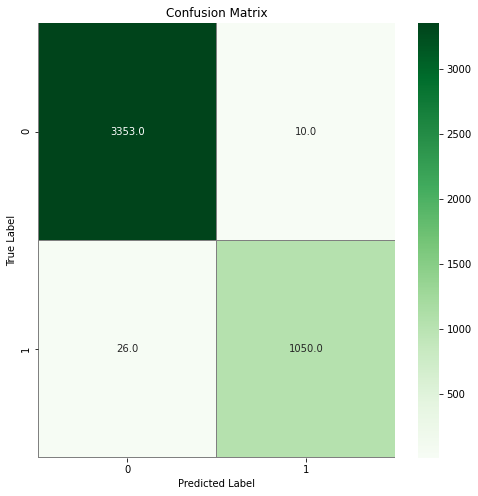

In [51]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

import numpy as np
Y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

import seaborn as sns
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

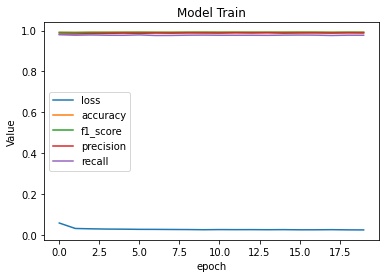

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['f1_score'])
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.title('Model Train')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy','f1_score', 'precision', 'recall'], loc='center left')
plt.show()

## 4 hidden layer 

In [53]:
model.add(Dense(32, activation = 'relu', input_dim = 15))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [55]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_score, Precision(name='precision'), Recall(name='recall')])
history = model.fit(X_train, Y_train, batch_size = 10, epochs = 20)

Epoch 1/20
1776/1776 [==============================] - 6s 2ms/step - loss: 0.1110 - accuracy: 0.9862 - f1_score: 0.9862 - precision: 0.9688 - recall: 0.9782
Epoch 2/20
1776/1776 [==============================] - 5s 3ms/step - loss: 0.0273 - accuracy: 0.9906 - f1_score: 0.9906 - precision: 0.9827 - recall: 0.9795
Epoch 3/20
1776/1776 [==============================] - 4s 2ms/step - loss: 0.0303 - accuracy: 0.9908 - f1_score: 0.9908 - precision: 0.9842 - recall: 0.9784
Epoch 4/20
1776/1776 [==============================] - 4s 2ms/step - loss: 0.0292 - accuracy: 0.9921 - f1_score: 0.9921 - precision: 0.9893 - recall: 0.9788
Epoch 5/20
1776/1776 [==============================] - 4s 2ms/step - loss: 0.0296 - accuracy: 0.9908 - f1_score: 0.9908 - precision: 0.9869 - recall: 0.9752
Epoch 6/20
1776/1776 [==============================] - 4s 2ms/step - loss: 0.0280 - accuracy: 0.9913 - f1_score: 0.9913 - precision: 0.9846 - recall: 0.9796
Epoch 7/20
1776/1776 [==============================

In [56]:
model_val = model.evaluate(X_test,Y_test)
print(model_val)

139/139 [==============================] - 1s 1ms/step - loss: 0.0314 - accuracy: 0.9919 - f1_score: 0.9917 - precision: 0.9906 - recall: 0.9758
[0.03140312060713768, 0.9918900728225708, 0.9917305111885071, 0.9905660152435303, 0.975836455821991]


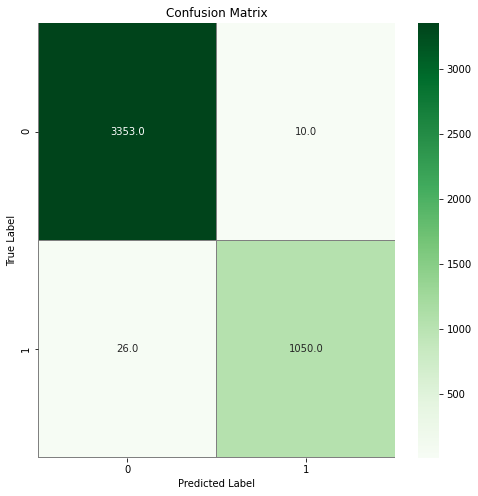

In [60]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

import numpy as np
Y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

import seaborn as sns
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

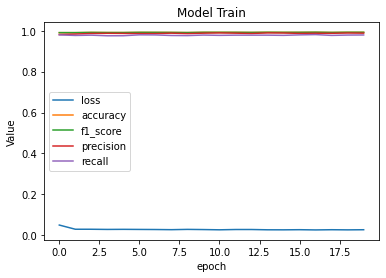

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['f1_score'])
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.title('Model Train')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy','f1_score', 'precision', 'recall'], loc='center left')
plt.show()

In [63]:
## 4 hidden layer, activation ='tanh'

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

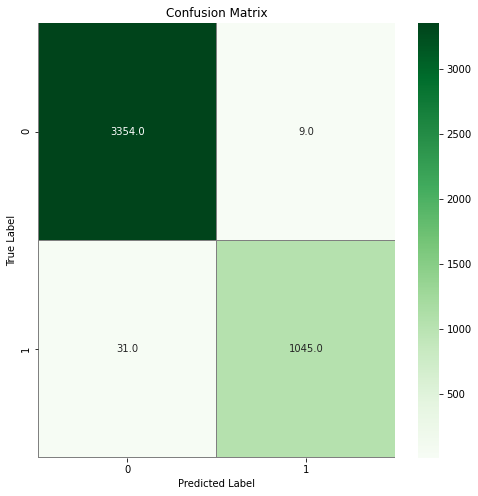

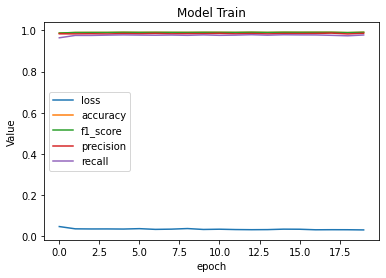

In [64]:
model.add(Dense(32, activation = 'tanh', input_dim = 15))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(128, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_score, Precision(name='precision'), Recall(name='recall')])
history = model.fit(X_train, Y_train, batch_size = 10, epochs = 20)

model_val = model.evaluate(X_test,Y_test)
print(model_val)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

import numpy as np
Y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

import seaborn as sns
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['f1_score'])
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.title('Model Train')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy','f1_score', 'precision', 'recall'], loc='center left')
plt.show()

## 3 hiden layer, activation ='tanh'

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

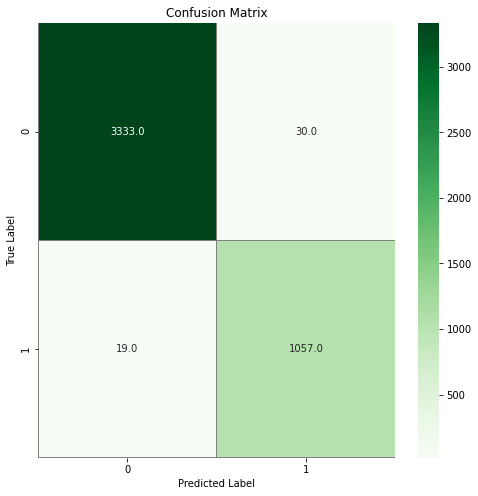

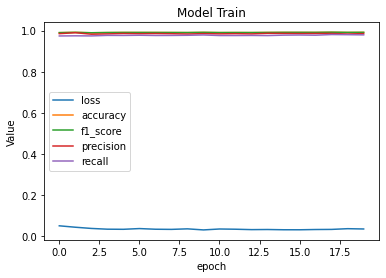

In [65]:
model.add(Dense(32, activation = 'tanh', input_dim = 15))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_score, Precision(name='precision'), Recall(name='recall')])
history = model.fit(X_train, Y_train, batch_size = 10, epochs = 20)

model_val = model.evaluate(X_test,Y_test)
print(model_val)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

import numpy as np
Y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

import seaborn as sns
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['f1_score'])
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.title('Model Train')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy','f1_score', 'precision', 'recall'], loc='center left')
plt.show()

## 2 hidden layer, activation='tanh'

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

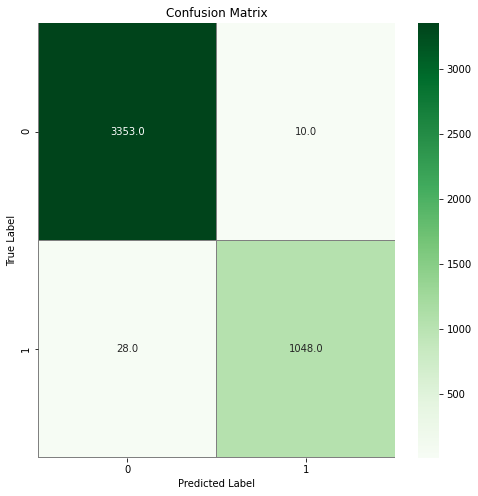

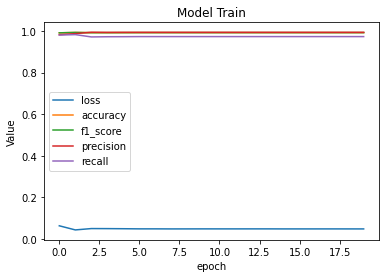

In [66]:
model.add(Dense(32, activation = 'tanh', input_dim = 15))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_score, Precision(name='precision'), Recall(name='recall')])
history = model.fit(X_train, Y_train, batch_size = 10, epochs = 20)

model_val = model.evaluate(X_test,Y_test)
print(model_val)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

import numpy as np
Y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

import seaborn as sns
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['f1_score'])
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.title('Model Train')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy','f1_score', 'precision', 'recall'], loc='center left')
plt.show()

## 1 hidden layer, activation ='tanh'

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

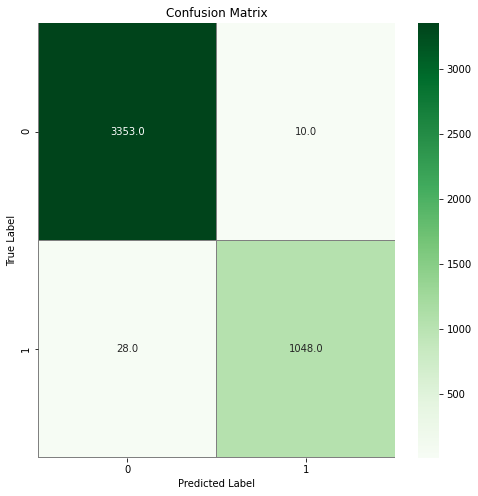

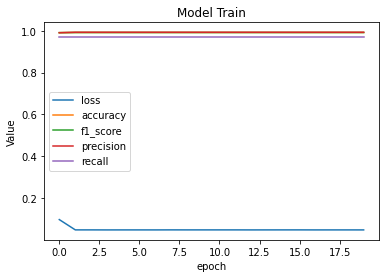

In [67]:
model.add(Dense(32, activation = 'tanh', input_dim = 15))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_score, Precision(name='precision'), Recall(name='recall')])
history = model.fit(X_train, Y_train, batch_size = 10, epochs = 20)

model_val = model.evaluate(X_test,Y_test)
print(model_val)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

import numpy as np
Y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

import seaborn as sns
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['f1_score'])
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.title('Model Train')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy','f1_score', 'precision', 'recall'], loc='center left')
plt.show()

## 1 hidden layer, activation='softmax'

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

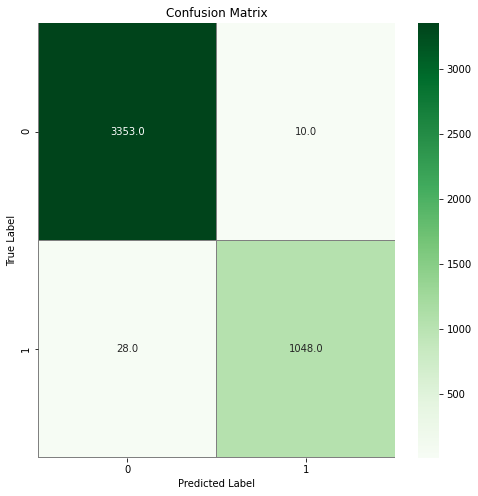

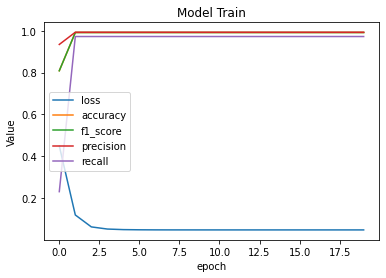

In [68]:
model.add(Dense(32, activation = 'softmax', input_dim = 15))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_score, Precision(name='precision'), Recall(name='recall')])
history = model.fit(X_train, Y_train, batch_size = 10, epochs = 20)

model_val = model.evaluate(X_test,Y_test)
print(model_val)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

import numpy as np
Y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

import seaborn as sns
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['f1_score'])
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.title('Model Train')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy','f1_score', 'precision', 'recall'], loc='center left')
plt.show()

## 2 hidden layer, activation='softmax'

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

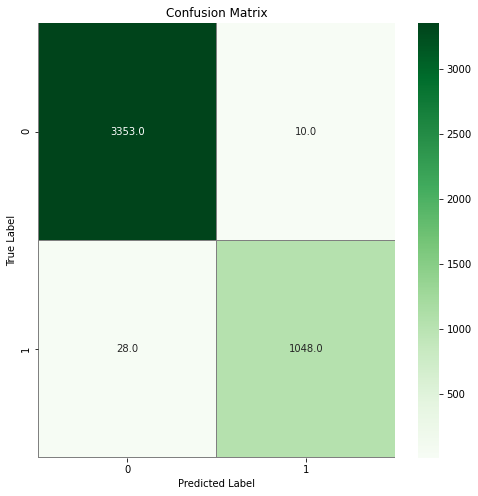

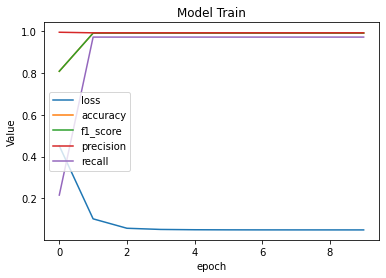

In [69]:
model.add(Dense(32, activation = 'softmax', input_dim = 15))
model.add(Dense(32, activation = 'softmax'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_score, Precision(name='precision'), Recall(name='recall')])
history = model.fit(X_train, Y_train, batch_size = 10, epochs = 10)

model_val = model.evaluate(X_test,Y_test)
print(model_val)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

import numpy as np
Y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

import seaborn as sns
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['f1_score'])
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.title('Model Train')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy','f1_score', 'precision', 'recall'], loc='center left')
plt.show()

## 3 hidden layer, activation ='softmax'

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

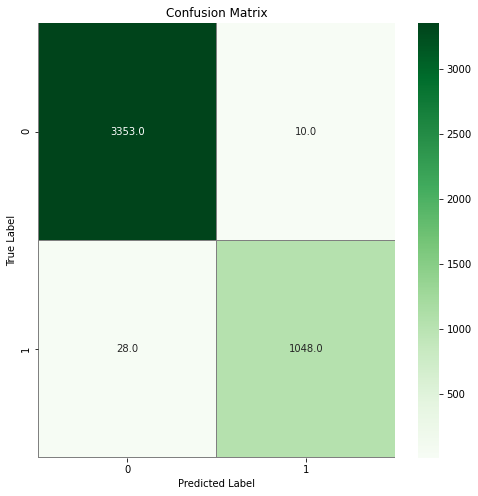

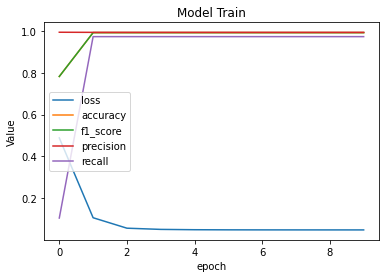

In [71]:
model.add(Dense(32, activation = 'softmax', input_dim = 15))
model.add(Dense(32, activation = 'softmax'))
model.add(Dense(64, activation = 'softmax'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_score, Precision(name='precision'), Recall(name='recall')])
history = model.fit(X_train, Y_train, batch_size = 10, epochs = 10)

model_val = model.evaluate(X_test,Y_test)
print(model_val)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

import numpy as np
Y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

import seaborn as sns
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['f1_score'])
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.title('Model Train')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy','f1_score', 'precision', 'recall'], loc='center left')
plt.show()

## 4 hidden layer, activation ='softmax'

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

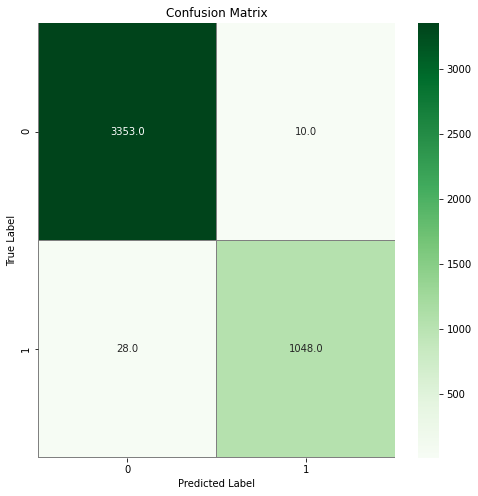

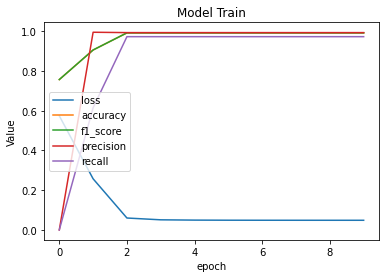

In [72]:
model.add(Dense(32, activation = 'softmax', input_dim = 15))
model.add(Dense(32, activation = 'softmax'))
model.add(Dense(64, activation = 'softmax'))
model.add(Dense(128, activation = 'softmax'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_score, Precision(name='precision'), Recall(name='recall')])
history = model.fit(X_train, Y_train, batch_size = 10, epochs = 10)

model_val = model.evaluate(X_test,Y_test)
print(model_val)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

import numpy as np
Y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

import seaborn as sns
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['f1_score'])
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.title('Model Train')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy','f1_score', 'precision', 'recall'], loc='center left')
plt.show()